# Presidenct Election

#### By Ying Liu
#### CMSC320, Fall 2020

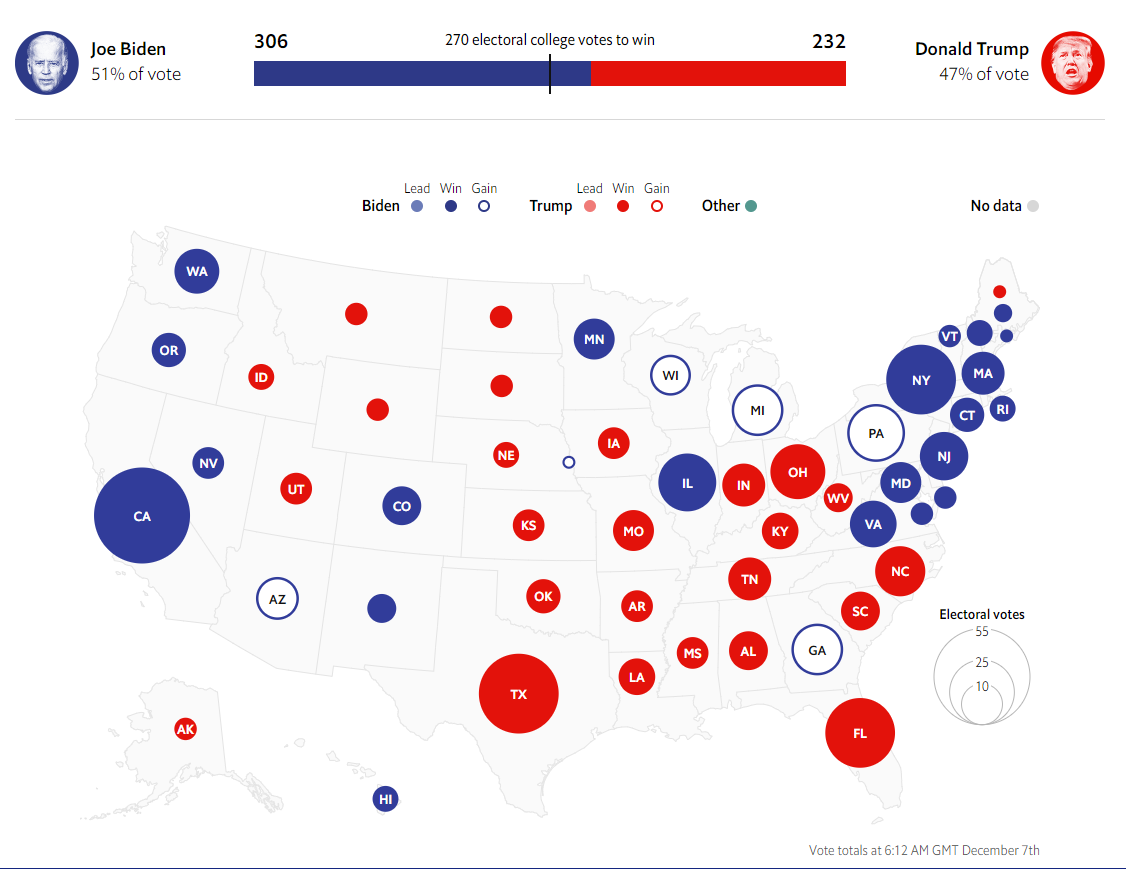

https://www.economist.com/graphic-detail/2020/11/03/the-us-2020-election-results

## Introduction

Each term of the President of the United States is four years, and a person can only be elected to be president two times for a total of eight years. An election for president of the United States happens every four years on the first Tuesday after the first Monday in November, and which was one of events with the highest participation by people.

In other U.S. elections, candidates are elected directly by popular vote. But the election of the president and the vice president of the United States is an indirect election in which citizens of the United States who are registered to vote in one of the fifty U.S. states or in Washington, D.C., cast ballots not directly for those offices, but instead for members of the Electoral College.  These electors then cast direct votes, known as electoral votes, for president, and for vice president. The candidate who receives an absolute majority of electoral votes (at least 270 out of 538) is then elected to that office. If no candidate receives an absolute majority of the votes for president.

This year is president election year, and we say that the election results is the most anxious among all election years. My tutorial does not discuss how to predict elections because I am not involved in opinion polls, and that will involve a lot of uncertain data collection. My tutorial is only to discuss and analyze the potential trends in the results of each presidential election. And these analysis results are based on the data coming from MIT election data + science lab.

## Required Libraries

<p>We recommend using Jupyter Notebook since Python is included and it is a great editor for data analysis. We will also need to following libraries:</p>
<ul>
<li>pandas</li>
<li>numpy</li>
<li>scikit-learn</li>
<li>matplotlib</li>
<li>folium</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import math as math
import seaborn as sbn
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## 1. Data Colletion

<p>The first thing we need to do is download the datasets from different websites. The files downloaded will be in different forms. Then, we have to load the files to our Jupyter Notebook in order to process the data within them. To do this, pandas libraries will help us initialize the data in nice frames and columns. If you are unfamiliar with pandas, its documentation can be found at:</p>
<ul>
<li>Complete Documentation: https://pandas.pydata.org/pandas-docs/stable/</li>
<li>Pandas Cheat Sheet: https://www.datacamp.com/community/blog/python-pandas-cheat-sheet</li>
</ul>

### 1.1 State-level returns for elections to the U.S. presidency from 1976 to 2016

To begin with, I collect the dataset on “MIT election data and science lab” https://electionlab.mit.edu/data. which contain constituency (state-level) returns for elections to the U.S. presidency from 1976 to 2016.

In [2]:
president_state_returns = pd.read_table("https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/42MVDX/MFU99O")
president_state_returns.index += 1
president_state_returns.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
1,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin \\""Ben\""\""""",prohibition,False,6669,1182850,20171015,NaN
5,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


### 1.2 County-level returns for elections to the U.S. presidency from 2000 to 2016

Collect the dataset which contains county-level returns for election from 2000-2016.

In [3]:
president_county_returns = pd.read_table("https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/VOQCHQ/HEIJCQ")
president_county_returns.index += 1
president_county_returns.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
1,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
4,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
5,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203


### 1.3 Chronological List of Presidents

Download the presidents list on site https://gist.github.com/namuol/2657233 which is csv file has chronological list of presidents which also includes party name

In [4]:
presidents_list = pd.read_csv("presidents.csv")
presidents_list.index += 1
presidents_list.head()

,Presidency,President,Wikipedia Entry,Took office,Left office,Party,Portrait,Thumbnail,Home State
1,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,30/04/1789,4/03/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia
2,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,4/03/1797,4/03/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts
3,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,4/03/1801,4/03/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia
4,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,4/03/1809,4/03/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia
5,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,4/03/1817,4/03/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia


### 1.4 Electoral votes 

The votes of the public determine electors, who formally choose the president through the electoral college. In the United States, 270 electoral votes of the 538 electors are currently required to win the presidential election. All votes must be counted, even if the candidate has won by 270 electoral votes.
I collect the elecotral votes by states as a csv file, and will read that file in folder.

In [5]:
electoral_collete_votes = pd.read_csv("electoral-college-votes-by-state.csv", dtype=object)
electoral_collete_votes.index += 1
electoral_collete_votes.head()

,state,number
1,Alabama,9
2,Alaska,3
3,Arizona,11
4,Arkansas,6
5,California,55


## 2. Data Tidying

### 2.1 Remove unneccessary information out from datasets

For the datasets I collected, president_state_return, president_count_return, presidents_list, there are some columns which contain inforamtion which are not relative with my furthur analysis, so I will move these columns out and keep the coulumns which are really helpful for my later exploration. For the Chronological List of Presidents, I will only keep the president list from 1976 to 2016 because the election data only cover this time frame.

In [6]:
p_s_r = president_state_returns.drop(['state_po', 'state_fips', 'state_cen', 'state_ic', 'office', 'writein', 'version', 'notes'], axis = 1)
p_c_r = president_county_returns.drop(['state_po', 'FIPS', 'office', 'version'], axis =1)
p_l = presidents_list.drop(['Wikipedia Entry', 'Portrait', 'Thumbnail'], axis =1)

In [7]:
# Only keep the year in "Took office" and "Left office" on table presidents
# lsit as 'start' and 'end'
p_l['Took office '] = p_l['Took office '].astype(str)
p_l['Left office '] = p_l['Left office '].astype(str)
p_l['start'] = p_l['Took office '].str[-4:]
p_l['end'] = p_l['Left office '].str[-4:]
p_l = p_l.drop(['Took office ', 'Left office '],axis = 1)
p_l.tail(7)

,Presidency,President,Party,Home State,start,end
38,38,Gerald Ford,Republican,Michigan,1974,1977
39,39,Jimmy Carter,Democratic,Georgia,1977,1981
40,40,Ronald Reagan,Republican,California,1981,1989
41,41,George H. W. Bush,Republican,Texas,1989,1993
42,42,Bill Clinton,Democratic,Arkansas,1993,2001
43,43,George W. Bush,Republican,Texas,2001,2009
44,44,Barack Obama,Democratic,Illinois,2009,2017


In [8]:
# Show the table data information to find out which rows should be moved out
# in president_state_return dataset.
p_s_r.tail(5)

,year,state,candidate,party,candidatevotes,totalvotes
3736,2016,Wyoming,NaN,NaN,6904,258788
3737,2016,Wyoming,NaN,independent,3224,258788
3738,2016,Wyoming,Blank Vote,NaN,2661,258788
3739,2016,Wyoming,"Castle, Darrell L.",constitution party,2042,258788
3740,2016,Wyoming,Over Vote,NaN,278,258788


In [9]:
# Show the table data information to find out which rows should be moved out
# in president_county_return dataset.
p_c_r.tail(5)

,year,state,county,candidate,party,candidatevotes,totalvotes
50520,2016,Alaska,District 40,Donald Trump,republican,1377.0,4610
50521,2016,Alaska,District 40,Other,NaN,895.0,4610
50522,2016,Alaska,District 99,Hillary Clinton,democrat,274.0,5056
50523,2016,Alaska,District 99,Donald Trump,republican,40.0,5056
50524,2016,Alaska,District 99,Other,NaN,28.0,5056


In [10]:
# Remove all rows which candidate is NaN or Other in president_state_returns 
p_s_r['candidate'] = p_s_r['candidate'].astype(str)
p_s_r = p_s_r.loc[p_s_r['candidate'] != 'nan'].reset_index(drop=True)
p_s_r = p_s_r.loc[p_s_r['candidate'] != 'Other'].reset_index(drop=True)
# In some rows the party named 'democrat' were showed as 'democratic-farmer-labor', we need to change
# then names as 'democrat' for consistancy
p_s_r.loc[(p_s_r.party == 'democratic-farmer-labor'), 'party'] = 'democrat'
# some candidatevostes is less than 100o all of a state will not consider to analyze
p_s_r = p_s_r.loc[p_s_r['candidatevotes'] > 1000].reset_index(drop=True)

# Remove all rows which candidate is Other in president_county_returns
p_c_r = p_c_r.loc[p_c_r['candidate'] != 'Other'].reset_index(drop=True)

In [11]:
# Keep tracking two tables's number of rows, in case cause adding new rows in
# merge below.
index_s = p_s_r.index
number_of_rows_s = len(index_s)
number_of_rows_s

2808

In [12]:
index_c = p_c_r.index
number_of_rows_c = len(index_c)
number_of_rows_c

34735

### 2.2 Merge tables to get every realtive datas together

Because who win presidency based on electoral_collete_votes information, so we merge electoral_collete_votes table infortion to president_state_return table and president_county_return table. 

In [13]:
electoral_collete_votes.rename(columns = {' number': 'number'}, inplace = True)

In [14]:
e_c_v = electoral_collete_votes
p_s_r_n = p_s_r.merge(e_c_v, how = 'left', left_on = ['state'], right_on = ['state'])
p_s_r_n.tail(2)

,year,state,candidate,party,candidatevotes,totalvotes,number
2806,2016,Wyoming,Blank Vote,NaN,2661,258788,3
2807,2016,Wyoming,"Castle, Darrell L.",constitution party,2042,258788,3


In [15]:
p_c_r_n = p_c_r.merge(e_c_v, how = 'left', left_on = ['state'], right_on = ['state'])
p_c_r_n.tail(2)

,year,state,county,candidate,party,candidatevotes,totalvotes,number
34733,2016,Alaska,District 99,Hillary Clinton,democrat,274.0,5056,3
34734,2016,Alaska,District 99,Donald Trump,republican,40.0,5056,3


In [16]:
# caculate the new merged table to verify their rows are the same.
index_sn = p_s_r_n.index
number_of_rows_sn = len(index_sn)
number_of_rows_sn

2808

In [17]:
# caculate the new merged table to verify their rows are the same.
index_cn = p_c_r_n.index
number_of_rows_cn = len(index_cn)
number_of_rows_cn

34735

Compare the number of rows, we know our table merge keeps correct rows. Now we collect all data we need and tidy them correctly, then we can start anylsis and explore the data to get some potential trends which maybe help for prediction certain results.

## 3. Exploratory Analysis & Data Visualization

At this point, my data is ready to analyze. I would like to visualize the data I kust cleaned up with some plots and map in order to portary and explain the trends of the election. Also, some statistical measurement for these data are include as well.

### 3.1 How did states votes for each candidates in each election year

In each election year, two main candidates came from republican party and democrat party, and they won the maroity of the election votes. There are some other parties or individual candidates also were took part in the election, but none of them won presidency. So I would not iclude these candidates in my analyze. But I would caculate each main candidates' winning votes percentage which also can show somehow other candidates states.

In [18]:
# get democrate party election votes states in each election year
democrat = p_s_r_n.loc[p_s_r_n['party'] == 'democrat'].reset_index(drop = True)
democrat['percentage'] = democrat['candidatevotes'] / democrat['totalvotes']
democrat_new = democrat[['year', 'state', 'percentage']]
#democrat_new =  democrat_new.set_index('state')
len(democrat_new)

561

In [19]:
# get republican party election votes states in each election year
republican = p_s_r_n.loc[p_s_r_n['party'] == 'republican'].reset_index(drop = True)
republican['percentage'] = republican['candidatevotes'] / republican['totalvotes']
republican_new = republican[['year', 'state', 'percentage']]
#republican_new =  republican_new.set_index('state')
len(republican_new)

561

There are 11 elections in president_state_return, and there are 51 voting states, so 11*51 = 561. This number is match the above we filter for democrat and republican 11 years election result. 

In [20]:
states = democrat_new['state'].drop_duplicates()
democrat_new =  democrat_new.set_index('state')

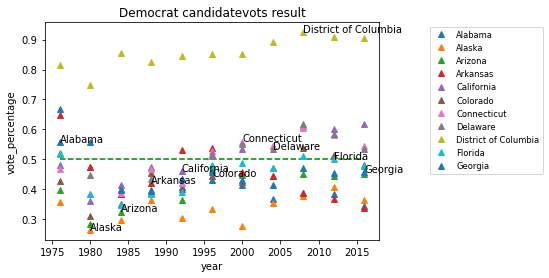

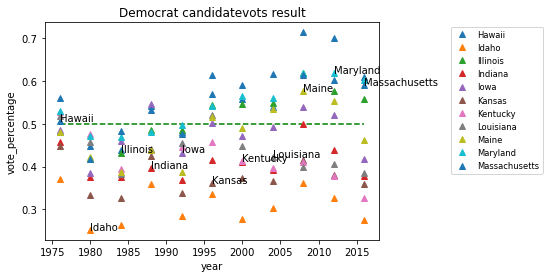

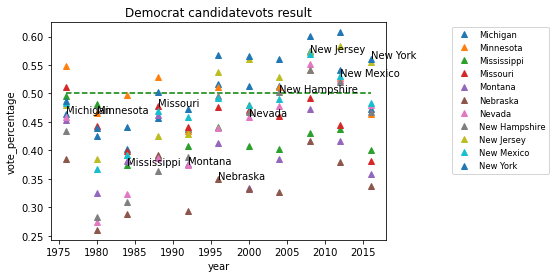

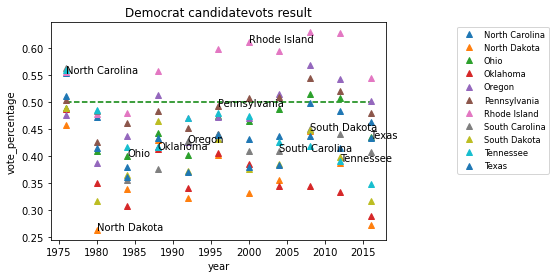

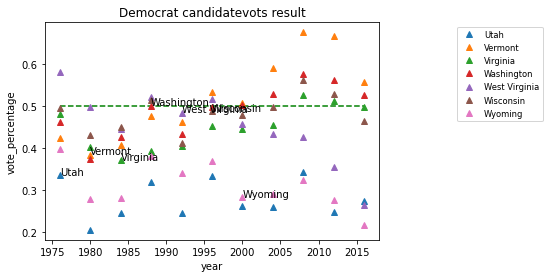

In [21]:
# plot every state vote for democrat's candidates in every elcection year percentage chart
fontP = FontProperties()
fontP.set_size('small')

for i in range(5):
    plt.figure()
    plt.subplot()
    j = 51 - 11*i
    states_new = states.tail(j)
    year = 1976
    for t in states_new:
        temp1 = democrat_new.loc[lambda democrat_new: democrat_new.year == year, :]
        if t in temp1.index:
            num = temp1.loc[t, 'percentage']
            plt.annotate(t, xy = (year, num))
            plt.title('Democrat candidatevots result')
            plt.xlabel('year')
            plt.ylabel('vote_percentage')
            plt.plot(democrat_new.loc[t, 'year'], democrat_new.loc[t, 'percentage'],'^', label = t)
            plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right', prop=fontP)
            if (year < 2016):
                year += 4
            else:
                year = 1990
    plt.hlines(0.5, 1976, 2016, colors='g', linestyles='dashed', label='', data=None)

In [22]:
states = republican_new['state'].drop_duplicates()
republican_new =  republican_new.set_index('state')

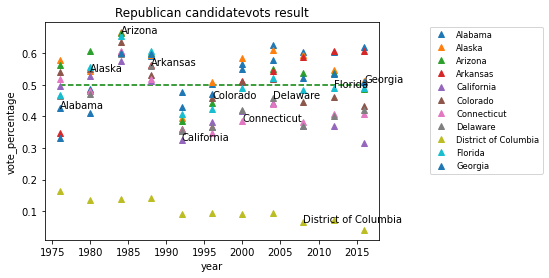

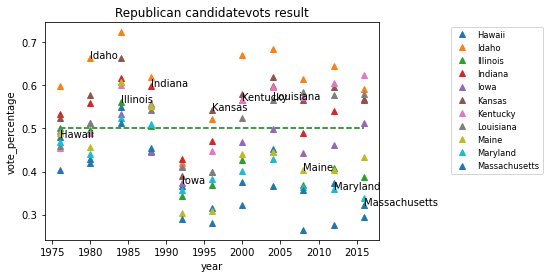

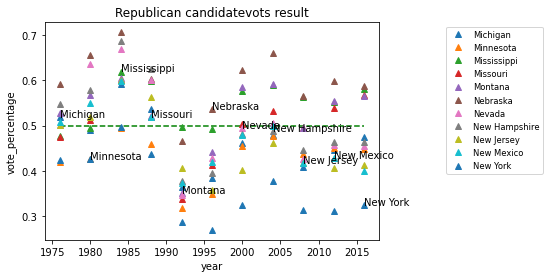

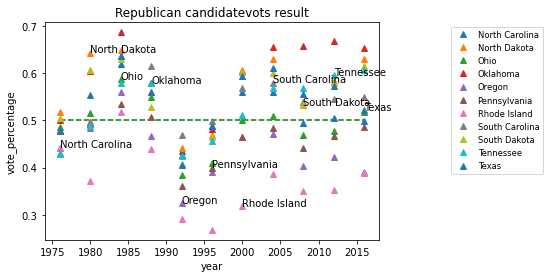

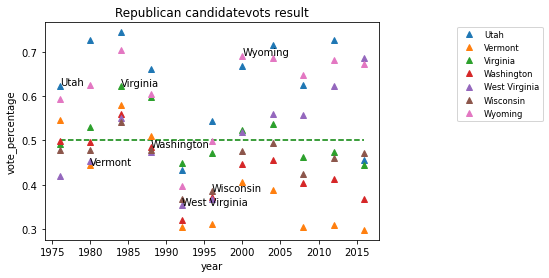

In [23]:
# plot every state voting for republican's candidates in every elcection year percentage chart
fontP = FontProperties()
fontP.set_size('small')

for i in range(5):
    plt.figure()
    plt.subplot()
    j = 51 - 11*i
    states_new = states.tail(j)
    year = 1976
    for t in states_new:
        temp1 = republican_new.loc[lambda republican_new: republican_new.year == year, :]
        if t in temp1.index:
            num = temp1.loc[t, 'percentage']
            plt.annotate(t, xy = (year, num))
            plt.title('Republican candidatevots result')
            plt.xlabel('year')
            plt.ylabel('vote_percentage')
            plt.plot(republican_new.loc[t, 'year'], republican_new.loc[t, 'percentage'], '^',label = t)
            plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right', prop=fontP)
            if (year < 2016):
                year += 4
            else:
                year = 1990
    plt.hlines(0.5, 1976, 2016, colors='g', linestyles='dashed', label='', data=None)

As we can be seen from the above chart, in 1984 and 1988, the Republican Party won the election without any suspense, while in 1992 and 1996, the Republican Party lost its absolute advantage in the election, and the Democratic Party won the election easily. In other years, candidates from Republicans and Democratic competed fiercely.

It can also be seen from the above chart that some states, such as Vermont, Washington, Rohode Island, New York, Maryland, Massachusetts, and Illinois, Hawaii, California, are all solid camps for Democratic candidates. Other states, such as Utah, Wyoming, North Dakota, Oklahoma, Tennessee, Nebraska, Montana, Mississipi, Idaho, Kentucky, are all solid camps for Democratic candidates.

There are also some states, such as: Michigan, Georgia, Pennsylvania, Virgina, Wisconsin, New Mexicao, Minnesota, they don’t seem to be in the camp of a certain political party all the time, so these state have been surely became the key area where the two parties strive for in every presidential election. 

### 3.2 How did each candidates won the total electoral members in each election year

We have analyzed the election situation in each state, and the number of electoral votes won by each candidate were varies by each state's electoral members. Now we look at the total elecotral memebers which each candidate won in each election year. This will also be the deciding factor for winnind prpesidency.

In [24]:
# Merge two tables to see which candidate won more votes in each state in every election year.
two_party = democrat.merge(republican, how = 'left', left_on = ['year','state'], right_on = ['year', 'state'] )
two_party = two_party.drop(['totalvotes_x', 'percentage_x','totalvotes_y','percentage_y'],axis = 1)
democrat_won = two_party.loc[two_party['candidatevotes_x'] > two_party['candidatevotes_y']].reset_index(drop = True)
republican_won = two_party.loc[two_party['candidatevotes_x'] < two_party['candidatevotes_y']].reset_index(drop = True)

In [25]:
# Aggreaget electoral number grouby year and candidate, get every election year total electoral 
# for democrat's candidate. 
democrat_won_new = democrat_won.drop(['party_x', 'state', 'candidatevotes_x','candidate_y', 'party_y','candidatevotes_y','number_y'],axis = 1)
democrat_won_new.index += 1
democrat_won_new['number_x'] = democrat_won_new['number_x'].astype(int)
democrat_result = democrat_won_new.groupby(['year','candidate_x']).sum()
democrat_result

,,number_x
year,candidate_x,
1976,"Carter, Jimmy",292
1980,"Carter, Jimmy",81
1984,"Mondale, Walter",13
1988,"Dukakis, Michael",101
1992,"Clinton, Bill",357
1996,"Clinton, Bill",369
2000,"Gore, Al",253
2004,"Kerry, John",246
2008,"Obama, Barack H.",358


In [26]:
democrat_won_electoral = democrat_won_new.groupby('year', as_index = False).agg({'number_x': 'sum'})
democrat_won_electoral.index += 1

In [27]:
# Aggreaget electoral number grouby year and candidate, get every election year total electoral 
# for republican's candidate. 
republican_won_new = republican_won.drop(['party_y','state', 'candidatevotes_y','candidate_x', 'party_x','candidatevotes_x','number_x'],axis = 1)
republican_won_new.index += 1
republican_won_new['number_y'] = republican_won_new['number_y'].astype(int)
republican_result = republican_won_new.groupby(['year','candidate_y']).sum()
republican_result

,,number_y
year,candidate_y,
1976,"Ford, Gerald",246
1980,"Reagan, Ronald",457
1984,"Reagan, Ronald",525
1988,"Bush, George H.W.",437
1992,"Bush, George H.W.",181
1996,"Dole, Robert",169
2000,"Bush, George W.",285
2004,"Bush, George W.",292
2008,"McCain, John",180


In [28]:
republican_won_electoral = republican_won_new.groupby('year', as_index = False).agg({'number_y': 'sum'})
republican_won_electoral.index += 1

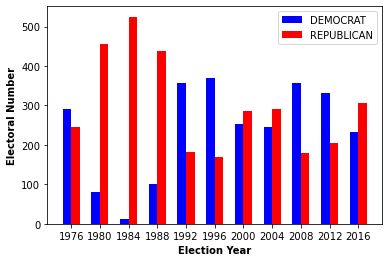

In [29]:
# Make bar plot to compare the total electoral number which two candidates coming form decromat
# and republican won in every election year.

x = np.arange(11)
ax1 = plt.subplot(1,1,1)
# set height of bar 
DEMOCRAT = democrat_won_electoral.loc[:,'number_x'].values
REPUBLICAN = republican_won_electoral.loc[:,'number_y'].values
YEAR = democrat_won_electoral.loc[:,'year'].values
# Make the plot 
ax = plt.subplot(1,1,1)
w = 0.3
plt.xticks(x + w/2, YEAR)    
dem = ax.bar(x, DEMOCRAT, width=w, color='b', align='center')
rep = ax.bar(x+w, REPUBLICAN, width=w, color='r', align='center')
plt.legend([dem, rep],['DEMOCRAT', 'REPUBLICAN'])
# Adding Xticks  
plt.xlabel('Election Year', fontweight ='bold') 
plt.ylabel('Electoral Number', fontweight ='bold') 

plt.show() 


From the bar plot above, it is not difficult to see that in the 80's, the Republican Party was in power and won the election with an absolute overwhelming majority. This is also the era of the President of Regon as we all know. He was indeed an amazing general. In the second re-election election, he won almost all the states all over the country. This suffices to show how well his work during his first term was accepted and supported by the public, so he could win the support of all states in the re-election election.

In addition, we can also see from this bar chart that most presidential candidates have won the re-election elections. Does this also show that these presidents who can win re-election are more popular among the people? Let’s take a look at an example, President Rogen need not mention it, he is without a doubt. Clinton, Bill, Bush, George W, Obama, Barack H. They are the presidential candidates who won in the re-election elections, and they did have a very good performance in the polls.

From this chart, we can also see that the political arena in the United States is almost composed of two parties, the Democratic Party and the Republican Party, taking turns in power, mostly for 8 years. Conservative and radical tend to be peaceful in the alternation, which also shows that the democratic system checks and balances each other, and social development will not go to a certain extreme situation.

## 4. Prediction

### 4.1 Linear Regression on votes by election years

Now that we have our analysis done we can start doing linear regression and test our predictions. When doing a linear regression, we're taking data that is already there and predicting future data base on the patterns of the data we already have. We are going to take a linear regression of just for our candidates from Democrat and Repblican won the totalvotes vs Year data and compare it to another regression when candidatevotes using a f test. And we predict that if we can account many factors, we will be able to have more accurate predictions for which party will win the presidency.

Is there any trend in each state's support for a certain party? Is this trend changing quietly? Let us use linear regression to get some potential ideals.

Swing states have generally changed over time. For instance, the swing states' votes result the outcome of the elections. Based on my analysis above data from 1976 to 2016, the swing states on the list are Arizona,  Pennsylvania (20 votes), Ohio (18 votes), Michigan (16 votes) and Georgia (16 votes), and Wisconsin. My regression analyze below will be based on these states.

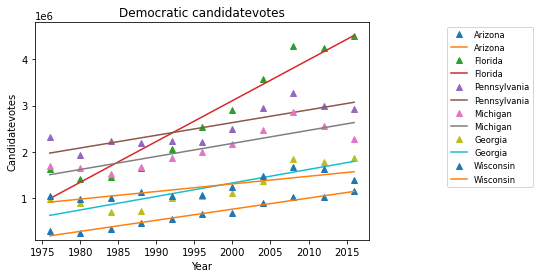

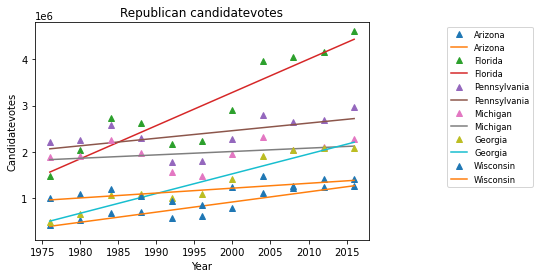

In [30]:
#Linear Regression
swing_states = ['Arizona','Florida','Pennsylvania','Michigan', 'Georgia','Wisconsin']
plt.figure()
plt.subplot()
# plot for democratic candidates regression line for swing stats
for t in swing_states:
    temp = two_party.loc[two_party['state'] == t].reset_index(drop = True)
    x = temp['year'].values
    y = temp['candidatevotes_x'].values
    plt.axis([1974, 2018, 100000, 4800000])
    plt.xlabel('Year')
    plt.ylabel('Candidatevotes')
    plt.title ('Democratic candidatevotes')
    plt.plot(x, y, '^', label = t)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, label = t)
    plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right', prop=fontP)
    
# plot for republican candidates regression line for swing stats
plt.figure()
plt.subplot()
for t in swing_states:
    temp = two_party.loc[two_party['state'] == t].reset_index(drop = True)
    x = temp['year'].values
    y = temp['candidatevotes_y'].values
    plt.axis([1974, 2018, 100000, 4800000])
    plt.xlabel('Year')
    plt.ylabel('Candidatevotes')
    plt.title ('Republican candidatevotes')
    plt.plot(x, y, '^', label = t)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, label = t)
    plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right', prop=fontP)

Regarding these six swing states, we can see from the regression lines in the above two tables that Arizona and Georgia’s support for the Republican Party has grown faster than their support for the Democratic Party, so they will become Republican supporters in the future. In Pennsylvania, Michigan, Wisconsin，these thress states are more likely to vote Democratic Party more, because their regression line growth rate is faster, so the Democratic candidates are more likely to win in the future in these three states. Florida seems like it hard to identify its support trends in future because the regression lines for Democratic Party and Republican Party is similar.

Because the number of electoral votes obtained for winning in different states is not the same, the general trend also needs to consider the factor of electoral votes. So for the Republican Party, it will be more likely to win Georgia 16 + Arizona 11, with a total of 27 votes. The Democrats will be more likely to win the remaining 3 states. They are Pennsylvania 20, Michigan 16, Wisconsin 10, 46 in total. However, it can be seen from the figure that the two parties have evenly matched chances of winning in Florida. Florida has 29 electoral seats. If the Republican Party can win Florida, then their candidate has the possibility of winning. But if the Republican Party loses Florida, then Republican will most likely lose the election. Althohgt Repulican won in Florida, Democratic candidate will still has chance to won presidency becuause there are only （46-27-29 = -10 ）ten electoral votes gap. So overall the trends is toward that Democratic candidate will have more chance to win presidency in future.

### 4.2 Fitting the Linear Regression Model
First we would need to create a new table that will group the data by Year and State so that we can get the candidatevotes associated with those columns. Next we would like to fit the data we had to the linear regression model. In order to do this we will be using the ols regression library to retrieve the linear regression formula. Documentation can be found at http://www.statsmodels.org/stable/index.html

I would like to regression with year and total electoral votes won as factors

In [31]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#Fit the regression
r_democrat = democrat.drop(['candidate','party','totalvotes','number','percentage'], axis = 1)
regression_democratic = ols(formula='year ~ candidatevotes', data = r_democrat).fit()
regression_democratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     20.76
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           6.39e-06
Time:                        21:40:38   Log-Likelihood:                -2209.4
No. Observations:                 561   AIC:                             4423.
Df Residuals:                     559   BIC:                             4431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1993.9079      0.698   2857.860      0.000    1992.537    1995.278
candidatevotes  2.103e-06   4.62e-07      4.557      0.000     1.2e-06    3.01e-06
==============================================================================
Omnibus:                      224.366   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.641
Skew:                           0.020   Prob(JB):                     3.66e-07
Kurtosis:                       1.875   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
r_republican = republican.drop(['candidate','party','totalvotes','number','percentage'], axis = 1)
regression_republican = ols(formula='year ~ candidatevotes', data = r_republican).fit()
regression_republican.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     10.92
Date:                Thu, 17 Dec 2020   Prob (F-statistic):            0.00101
Time:                        21:40:40   Log-Likelihood:                -2214.2
No. Observations:                 561   AIC:                             4432.
Df Residuals:                     559   BIC:                             4441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1994.2288      0.754   2645.860      0.000    1992.748    1995.709
candidatevotes   1.78e-06   5.39e-07      3.304      0.001    7.22e-07    2.84e-06
==============================================================================
Omnibus:                      299.920   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.084
Skew:                          -0.008   Prob(JB):                     1.08e-07
Kurtosis:                       1.829   Cond. No.                     1.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.3 Hypothesis Testing
In order to verify our hypothesis, I would like to introduce f-test. The purpose of this test is to verify our linear regression models fit the data well. A quick tutorial about f-test can be found at https://explorable.com/f-test. Also, f-test can be carried out by a technique called ANOVA. The demostration below uses this technique. How to use and syntax for this technique can be found at: http://www.statsmodels.org/stable/anova.html.

In [33]:
#Run ANOVA
d_hypo = sm.stats.anova_lm(regression_democratic, typ=2)
d_hypo

,sum_sq,df,F,PR(>F)
candidatevotes,3214.640593,1.0,20.763494,0.000006
Residual,86545.359407,559.0,NaN,NaN


In [34]:
#Run ANOVA
r_hypo = sm.stats.anova_lm(regression_republican, typ=2)
r_hypo

,sum_sq,df,F,PR(>F)
candidatevotes,1719.547762,1.0,10.918018,0.001013
Residual,88040.452238,559.0,NaN,NaN


We generally assume significate level is 0.05.  Based on our above test result, our p-value for the F-test is much less than our significance level. So we can say our sample data provide sufficient evidence to conclude that our regression model fits the data better than the model with no independent variables.

## 5. Conclusion

Through the analysis of this tutorial, although it is impossible for us to truly predict whether the presidential candidate will win, we can get some enlightenment. We can understand the trend in each state which party's candidate has more chance to win.

<ul>
    <li>In the past fourty years, Republicans and Democratic, the two parties is alternate on duty.</li>
    <li>The current president has a more chance of being re-elected</li>
    <li>Some states are staunch supporters of the Democratic Party, such as Vermont, Washington, Rohode Island, New York, Maryland, Massachusetts, and Illinois, Hawaii, California. Some states are staunch supporters of the Republican Party, such as Utah, Wyoming, North Dakota, Oklahoma, Tennessee, Nebraska, Montana, Mississipi, Idaho, Kentucky, these states have rarely changed their support posture in the last four decades of elections</li>
    <li>Some states belong to swing states. In the last 11 elections, they are not always biased towards a certain party, such as Michigan, Georgia, Pennsylvania, Virgina, Wisconsin, New Mexicao, Minnesota.</li>
    <li>In response to these swings, it seems that they have slowly begun to differentiate. Wisconsin and Georgia tend to support the Republican Party, while ennsylvania, Michigan, Wisconsin are more inclined to support the Democratic Party.</li>
    <li>Florida is a very unique state, and it is the key to every party's candidate. Florida does not seem to become redder or bluer, it has always maintained a neutral posture.</li>
</ul>  
In general, based on this tutorial,Democratic Party will have more chance to win presidency. If the Republicans lose Florida, then the Democrats will win without any suspense. But if the Republican Party wins in Florida, then the two parties still have struggle. This might the case we are facing now.


## References
<ul>
<li>https://www.usa.gov/election</li>
<li>Pandas Complete Documentation: https://pandas.pydata.org/pandas-docs/stable/</li>
<li>Pandas Cheat Sheet: https://www.datacamp.com/community/blog/python-pandas-cheat-sheet</li>
<li>Pandas groupy: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html</li>
<li>Matplotlib: https://matplotlib.org/</li>
<li>Folium: https://folium.readthedocs.io/en/latest/</li>
<li>https://electionlab.mit.edu/data</li>
<li>Linear Regression Model: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</li>
<li>Linear Regression Model Using OLS: http://www.statsmodels.org/stable/index.html</li>
<li>F-Test: https://explorable.com/f-test</li>
<li>ANOVA Technique: http://www.statsmodels.org/stable/anova.html</li>
</ul>